In [19]:
import nltk
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from pylab import rcParams
import re
import pandas as pd

In [2]:
html=requests.get("https://en.wikipedia.org/wiki/Ruby").text
soup=BeautifulSoup(html,"html.parser")

In [3]:
for script in soup(["script", "style"]):
    script.decompose()
#テキストのみ取り出す
text=soup.get_text()
print(text)





Ruby - Wikipedia































Ruby

From Wikipedia, the free encyclopedia


Jump to navigation
Jump to search
This article is about the mineral or gem. For other uses, see Ruby (disambiguation).
RubyNatural ruby crystals from Winza, TanzaniaGeneralCategoryOxide mineral varietyFormula(repeating unit)aluminium oxide with chromium, Al2O3:CrCrystal systemTrigonalCrystal classHexagonal scalenohedral (3m) H-M symbol: (3 2/m)Space groupR3c[1]IdentificationColorNear colorless through pink through all shades of red to a deep crimsonCrystal habitTerminated tabular hexagonal prismsCleavageNo true cleavageFractureConchoidal, splinteryTenacityBrittleMohs scale hardness9.0LusterSubadamantine, vitreous, pearly (on partings)StreakWhiteDiaphaneityTransparent, translucentSpecific gravity3.97 – 4.05Optical propertiesUniaxial -Refractive indexnω=1.768–1.772 nε=1.760–1.763Birefringence0.008PleochroismStrong: purplish-red – orangy-redDispersion0.018Ultraviolet fluorescenceRed under lon

In [4]:
lines= [line.strip() for line in text.splitlines()]

In [5]:
#数値は無視する。
text = re.sub(r'\d+', '', text)
#4文字以上の単語が対象
text = re.sub(r'\b\w{1,3}\b', '', text)
#ハイフンからはじまる語は無視
text = re.sub(r'^-\w+', '', text)

In [6]:
#tokens = nltk.word_tokenize(text)
#tokens = nltk.word_tokenize(nonNumberText)
tokens = nltk.word_tokenize(text)


In [7]:
text = nltk.Text(tokens)


In [8]:
type(tokens)

list

In [9]:
tokens_l = [w.lower() for w in tokens]
#重複なしの語数を表示
len(set(tokens_l))

1373

In [10]:
#ストップワード設定
stopwords = nltk.corpus.stopwords.words('english')
#オリジナル:記号よけ
symbols = ["'", "''", '"', '`','``', '.','..','...', ',', '-', '–','−', '!', '?', ':', ';', '(', ')', '[', ']','’','’','$','“','”','>','<','#','@','{','}','\\','\\\\','/','//','_','=','==','+','++','-','--','*','|','||','~','^','&','%','--','°']
#オリジナル:省略I'mなど
short = ["'m","'re","'t","'s","n't","'d","'ll","'ve"]

In [11]:
#オリジナル:GSL (General Service List ; about 2000 Words)より作成
stGSL = open("stopGSL.txt", "r")
list_GSL=stGSL.read().splitlines()

In [12]:
fdist = nltk.FreqDist(w.lower() for w in text if w.lower() not in stopwords + symbols + list_GSL + short)

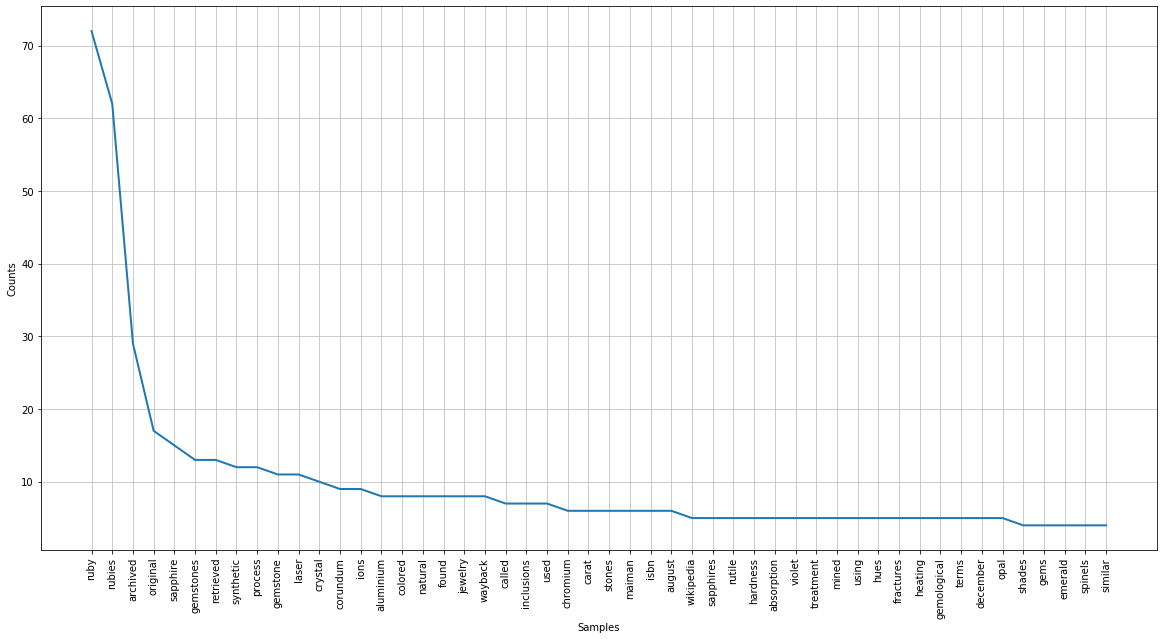

In [13]:
#グラフの表示サイズ調整
rcParams['figure.figsize'] = 20,10
#上位50の出現度をグラフで表示
fdist.plot(50)

In [14]:
#上位500の出現数を表示
fdist.most_common(500)

[('ruby', 72),
 ('rubies', 62),
 ('archived', 29),
 ('original', 17),
 ('sapphire', 15),
 ('gemstones', 13),
 ('retrieved', 13),
 ('synthetic', 12),
 ('process', 12),
 ('gemstone', 11),
 ('laser', 11),
 ('crystal', 10),
 ('corundum', 9),
 ('ions', 9),
 ('aluminium', 8),
 ('colored', 8),
 ('natural', 8),
 ('found', 8),
 ('jewelry', 8),
 ('wayback', 8),
 ('called', 7),
 ('inclusions', 7),
 ('used', 7),
 ('chromium', 6),
 ('carat', 6),
 ('stones', 6),
 ('maiman', 6),
 ('isbn', 6),
 ('august', 6),
 ('wikipedia', 5),
 ('sapphires', 5),
 ('rutile', 5),
 ('hardness', 5),
 ('absorption', 5),
 ('violet', 5),
 ('treatment', 5),
 ('mined', 5),
 ('using', 5),
 ('hues', 5),
 ('fractures', 5),
 ('heating', 5),
 ('gemological', 5),
 ('terms', 5),
 ('december', 5),
 ('opal', 5),
 ('shades', 4),
 ('gems', 4),
 ('emerald', 4),
 ('spinels', 4),
 ('similar', 4),
 ('treatments', 4),
 ('references', 4),
 ('links', 4),
 ('yellow-green', 4),
 ('optical', 4),
 ('imperfections', 4),
 ('including', 4),
 ('heated

In [338]:
#特定の単語が含まれる行の表示(対象：text)
text.concordance('how', lines=5)

no matches


In [17]:
#fdistは辞書形式
fdist.items()

dict_items([('ruby', 72), ('wikipedia', 5), ('encyclopedia', 1), ('navigation', 3), ('uses', 2), ('disambiguation', 1), ('rubynatural', 1), ('crystals', 1), ('winza', 1), ('tanzaniageneralcategoryoxide', 1), ('varietyformula', 1), ('repeating', 1), ('aluminium', 8), ('oxide', 2), ('chromium', 6), ('crcrystal', 1), ('systemtrigonalcrystal', 1), ('classhexagonal', 1), ('scalenohedral', 1), ('symbol', 1), ('grouprc', 1), ('identificationcolornear', 1), ('colorless', 3), ('shades', 4), ('crimsoncrystal', 1), ('habitterminated', 1), ('tabular', 1), ('hexagonal', 1), ('prismscleavageno', 1), ('true', 1), ('cleavagefractureconchoidal', 1), ('splinterytenacitybrittlemohs', 1), ('hardness.lustersubadamantine', 1), ('vitreous', 1), ('pearly', 1), ('partings', 1), ('streakwhitediaphaneitytransparent', 1), ('translucentspecific', 1), ('gravity', 1), ('.optical', 1), ('propertiesuniaxial', 1), ('-refractive', 1), ('indexnω=.–', 1), ('=.–.birefringence.pleochroismstrong', 1), ('purplish-', 1), ('ora

In [36]:
#pandasのdataframeに変換
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
print(df_fdist)

              Frequency
Term                   
ruby                 72
wikipedia             5
encyclopedia          1
navigation            3
uses                  2
...                 ...
contact               1
developers            1
cookie                1
statement             1
mobile                1

[1051 rows x 1 columns]


In [70]:
#表示が省略されないように設定
pd.set_option('display.max_rows' ,2000)

In [71]:
pd.get_option("display.max_rows")

2000

In [72]:
#pdによる出力
print(df_fdist)

                                                    Frequency
Term                                                         
ruby                                                       72
wikipedia                                                   5
encyclopedia                                                1
navigation                                                  3
uses                                                        2
disambiguation                                              1
rubynatural                                                 1
crystals                                                    1
winza                                                       1
tanzaniageneralcategoryoxide                                1
varietyformula                                              1
repeating                                                   1
aluminium                                                   8
oxide                                                       2
chromium

In [73]:
#pdによるFrequencyを対象とった降順の出力
df_s = df_fdist.sort_values('Frequency', ascending=False)
print(df_s)

                                                    Frequency
Term                                                         
ruby                                                       72
rubies                                                     62
archived                                                   29
original                                                   17
sapphire                                                   15
gemstones                                                  13
retrieved                                                  13
synthetic                                                  12
process                                                    12
laser                                                      11
gemstone                                                   11
crystal                                                    10
corundum                                                    9
ions                                                        9
jewelry 

In [88]:
print(df_s.index)

Index(['ruby', 'rubies', 'archived', 'original', 'sapphire', 'gemstones',
       'retrieved', 'synthetic', 'process', 'laser',
       ...
       'lead-containing', 'glass-powder', 'dipped', 'oils', 'covered',
       'embedded', 'tile', 'oxidizing', 'atmosphere', 'mobile'],
      dtype='object', name='Term', length=1051)


In [92]:
#コピペしやすいようにindexのみ表示
for i in range(len(df_s)):
    print(df_s.index[i])

ruby
rubies
archived
original
sapphire
gemstones
retrieved
synthetic
process
laser
gemstone
crystal
corundum
ions
jewelry
natural
wayback
found
aluminium
colored
inclusions
used
called
carat
isbn
maiman
chromium
august
stones
wikipedia
heating
terms
rutile
sapphires
gemological
mined
using
treatment
violet
hardness
absorption
opal
fractures
hues
december
imperfections
optical
yellow-green
spinel
laboratory
myanmar
transparency
heated
spinels
verneuil
similar
made
links
references
emerald
treatments
including
gems
—
january
china
shades
richard
commons
necklace
garnets
coral
amber
wikimedia
pakistan
mining
topaz
wavelength
million
structure
july
filling
colorless
minerals
electrons
tools
jeweler
transparent
energy
four
kashmir
pakistani
afghanistan
added
september
occurs
navigation
hughes
premium
amethyst
maint
clarity
occur
emitted
fusing
impurities
tourmaline
treasures
treated
known
link
held
peridot
thailand
obsidian
finest
onyx
stimulated
marble
mogok
taylor
burma
region
produced
ex

In [50]:
df_fdist.to_csv(...)

ValueError: Invalid file path or buffer object type: <class 'ellipsis'>

In [15]:
len(tokens)

3588